# Quickdraw

Steps
1. Load the data 

2. Make the labels 

3. normalize or preprocess the data 

4.Pipeline

5. Model

6.train

7.evaluate


In [0]:
!wget -qq https://www.dropbox.com/s/gdlb8dnjzcly51o/quickdraw.zip
  
!unzip -qq quickdraw.zip

!rm -r __MACOSX
!rm quickdraw.zip

!ls

quickdraw  sample_data


In [0]:
!ls quickdraw

'alarm clock.npy'   bee.npy		 cookie.npy	  lollipop.npy
 ambulance.npy	   'birthday cake.npy'	 donut.npy	 'palm tree.npy'
 angel.npy	    brain.npy		 eyeglasses.npy   pig.npy
 ant.npy	    cactus.npy		 face.npy	  postcard.npy
 banana.npy	    cat.npy		 fish.npy	  rainbow.npy


## Imports

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.cm as cm

import numpy as np

from glob import glob
import ntpath

from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

import tensorflow as tf 


import tensorflow.keras
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.optimizers import SGD

 



In [0]:
arr = np.load('./quickdraw/bee.npy')
arr.shape

(120890, 784)

In [0]:
file_names = glob('./quickdraw/*.npy')

In [0]:
# make some class names
class_names = []

for file in file_names:
  name = ntpath.basename(file)
  class_names.append(name[:-4])
  
  
print(class_names)

['pig', 'rainbow', 'postcard', 'eyeglasses', 'angel', 'birthday cake', 'palm tree', 'face', 'cactus', 'donut', 'ambulance', 'lollipop', 'alarm clock', 'ant', 'banana', 'cat', 'bee', 'fish', 'brain', 'cookie']


In [0]:
# get 200 of each class for plotting

x_data =np.array([])
y_labels =np.array([])

for i, filename in enumerate(file_names):
  labels = [i for j in range(200)]
  arr = np.load(filename)
  arr = arr[:200]
  if len(x_data) == 0:
    x_data = arr
    y_labels = np.asarray(labels)
  else:
    x_data = np.concatenate((x_data, arr))
    y_labels = np.concatenate((y_labels, labels))

In [0]:
y_labels.shape

(4000,)

In [0]:
y_labels[190:210]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

## For MNIST

In [0]:
(mnist_x,mnist_y), (_,_) = tf.keras.datasets.mnist.load_data()
mnist_x =mnist_x.reshape(60000,784)

11493376/11490434 [==============================] - 0s 0us/step


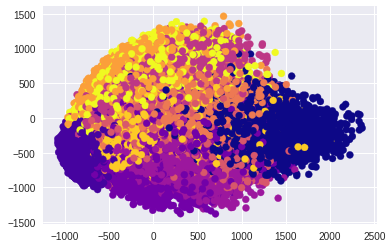

In [0]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(mnist_x)
groups = mnist_y.tolist()
colors = [int(i % 20) for i in groups]

plt.scatter(principalComponents[:,0], principalComponents[:,1], c=colors,cmap=plt.cm.plasma)
plt.show()

## PCA for QuickDraw

(2000, 2)


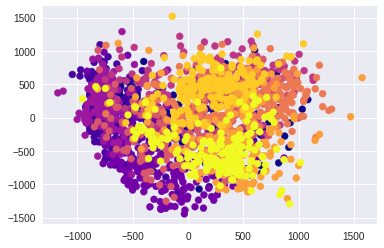

In [0]:
# from sklearn.preprocessing import StandardScaler
# x = StandardScaler().fit_transform(x_data)

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x_data[:2000])

print(principalComponents.shape)

groups = y_labels.tolist()
colors = [int(i % 20) for i in groups[:2000]]

plt.scatter(principalComponents[:,0], principalComponents[:,1], c=colors,cmap=plt.cm.plasma)
plt.show()

## Plot TSNE  for QuickDraw

In [0]:
import time

time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(x_data[:2000])

print('t-SNE Finished! Time elapsed: {} seconds'.format(time.time()-time_start))

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 2000 samples in 0.060s...
[t-SNE] Computed neighbors for 2000 samples in 7.672s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2000
[t-SNE] Computed conditional probabilities for sample 2000 / 2000
[t-SNE] Mean sigma: 646.283848
[t-SNE] KL divergence after 250 iterations with early exaggeration: 73.646591
[t-SNE] KL divergence after 300 iterations: 1.866110
t-SNE Finished! Time elapsed: 21.250431776046753 seconds


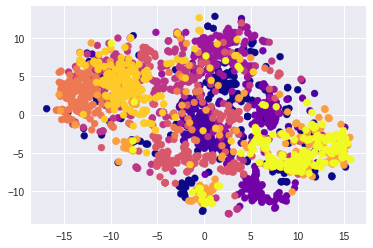

In [0]:
import matplotlib.cm as cm

groups = y_labels.tolist()

colors = [int(i % 20) for i in groups[:2000]]

plt.scatter(tsne_results[:,0], tsne_results[:,1], c=colors,cmap=plt.cm.plasma)
plt.show()

In [0]:
i= int(i % 20)

In [0]:
x_data =np.array([])
y_labels =np.array([])

for i, filename in enumerate(file_names):
  labels = [i for j in range(10000)]
  arr = np.load(filename)
  arr = arr[:10000]
  if len(x_data) == 0:
    x_data = arr
    y_labels = np.asarray(labels)
  else:
    x_data = np.concatenate((x_data, arr))
    y_labels = np.concatenate((y_labels, labels))  
    
    
    
 

In [0]:
#x_train, x_test, y_train, y_test = train_test_split(x_data, y_labels, test_size=0.2) 

# shuffle 
from sklearn.utils import shuffle 

x_data, y_labels = shuffle(x_data, y_labels, random_state=42) 
  
split =0.9

# test train split 
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_data, y_labels, test_size=0.1, random_state=42)


In [0]:
x_train.shape,y_train.shape

((180000, 784), (180000,))

In [0]:
#y_labels =np.array([]) 
y_labels[:10]


array([11,  7, 15,  6,  3,  2, 13, 17, 13,  0])

In [0]:
x_train.shape 


(180000, 784)

In [0]:
x_test.shape  


(20000, 784)

In [0]:
y_train.shape


(180000,)

In [0]:
y_test.shape

(20000,)

In [0]:
y_labels.shape

(200000,)

## Prepare data for network

In [0]:
image_size = 28

# Reshape and normalize
x_train = x_train.reshape(x_train.shape[0], image_size, image_size, 1).astype('float32')
x_test = x_test.reshape(x_test.shape[0], image_size, image_size, 1).astype('float32')

x_train /= 255.0
x_test /= 255.0

# Convert class vectors to class matrices
y_train = tf.keras.utils.to_categorical(y_train, len(class_names))
y_test = tf.keras.utils.to_categorical(y_test, len(class_names))

In [0]:
x_train.shape,y_train.shape

((180000, 28, 28, 1), (180000, 20))

## Data Pipeline

In [0]:
#tf.image.grayscale_to_rgb(
#    images,
#    name=None
#)



In [0]:
opt = SGD(lr = learning_rate)

NameError: ignored

In [0]:
input_shape = [28,28,1]
num_classes=20
learning_rate=0.001
batch_size = 128
training_epochs =5 

## Model

In [0]:
Inp=Input(shape=input_shape)
x = Conv2D(32, kernel_size=(3, 3), activation='relu',name = 'Conv_01')(Inp)
x = MaxPooling2D(pool_size=(2, 2),name = 'MaxPool_01')(x)
x = Conv2D(64, (3, 3), activation='relu',name = 'Conv_02')(x)
x = MaxPooling2D(pool_size=(2, 2),name = 'MaxPool_02')(x)
x = Conv2D(64, (3, 3), activation='relu',name = 'Conv_03')(x)
x = Flatten(name = 'Flatten_01')(x)
x = Dense(64, activation='relu',name = 'Dense_01')(x)
x = Dropout(0.5,name = 'Dropout_02')(x)
output = Dense(num_classes, activation='softmax',name = 'Dense_02')(x)

In [0]:
model = Model(Inp,output)

In [0]:
opt = tf.keras.optimizers.Adam(lr = learning_rate)

model.compile(loss=tf.keras.losses.categorical_crossentropy,
              optimizer= opt,
              metrics=['accuracy'])

## Train

In [0]:
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=training_epochs,
                    verbose=1, # This is for what we want it to display out as it trains 
                    validation_data=(x_test, y_test))

Train on 180000 samples, validate on 20000 samples
Epoch 1/5
180000/180000 [==============================] - 182s 1ms/step - loss: 1.1296 - acc: 0.6712 - val_loss: 0.5627 - val_acc: 0.8399
Epoch 2/5
180000/180000 [==============================] - 182s 1ms/step - loss: 0.6958 - acc: 0.8045 - val_loss: 0.4679 - val_acc: 0.8649
Epoch 3/5
180000/180000 [==============================] - 182s 1ms/step - loss: 0.5811 - acc: 0.8375 - val_loss: 0.4076 - val_acc: 0.8834
Epoch 4/5
180000/180000 [==============================] - 182s 1ms/step - loss: 0.5152 - acc: 0.8572 - val_loss: 0.3779 - val_acc: 0.8939
Epoch 5/5
180000/180000 [==============================] - 182s 1ms/step - loss: 0.4688 - acc: 0.8708 - val_loss: 0.3631 - val_acc: 0.8978


## Evaluate 

In [0]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.4673699393093586
Test accuracy: 0.8661
